# Bitcoin Project

**Summary**
This is mini to perform Exploratory Data Analysis(EDA) is Bitcoin (compared to dollar, BTC-USD) Prices from 2014 to 2022. The dataset is made up of colummns: Date, Open, Close High, Close, Adj Close and Volumne. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# silence warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
btc_df = pd.read_csv('BTC-USD.csv')
btc_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [3]:
# shape of data 
print(f'The dataset has {btc_df.shape[0]} rows and {btc_df.shape[1]} columns')

The dataset has 2747 rows and 7 columns


In [4]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


In [5]:
# summary of data
btc_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
mean,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Exploratory Data Analysis (EDA) will be employed on this dataset to investigate and reveal price changes over the time period during which it was collected. This dataset specifically tracks the exchange rate of Bitcoin (BTC) against the US Dollar (USD).

Text(0.5, 1.0, 'Bitcoin Close Price')

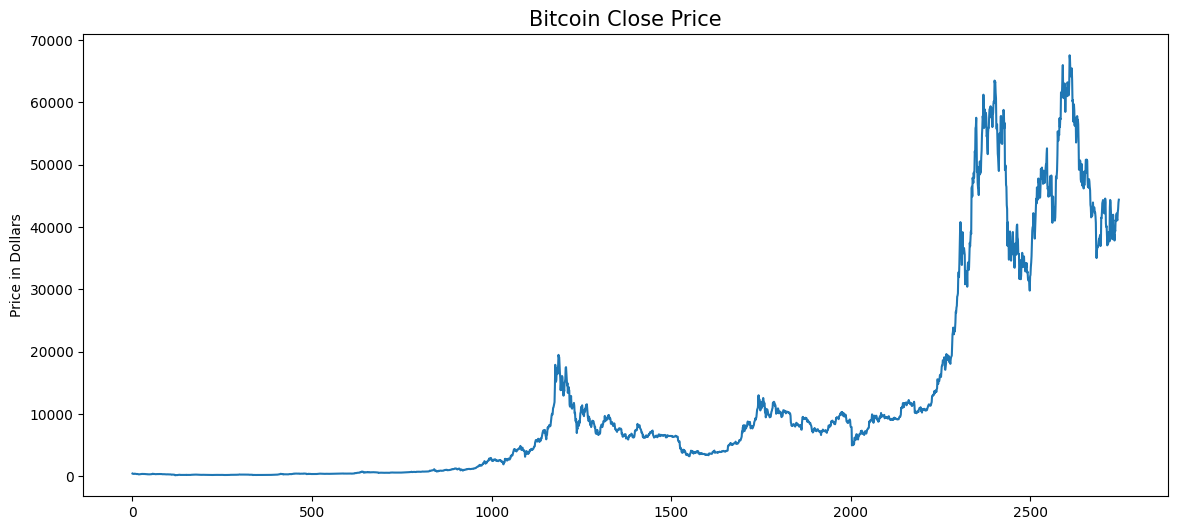

In [6]:
# bitcoin close price 
plt.figure(figsize=(14, 6))
plt.plot(btc_df['Close'])
plt.ylabel('Price in Dollars')
plt.title('Bitcoin Close Price', fontsize=15)

The prices of Bitcoin shows an upward trend, as depicted by the plot.

In [7]:
# close and adj close in the dataset are the same , introducing redundancy.

btc_df[btc_df['Close'] == btc_df['Adj Close']].shape, btc_df.shape
#return the number of rows where 'Close' is equal to 'Adj Close'.

((2747, 7), (2747, 7))

In [8]:
# we will drop 'Adj Close'
btc_df = btc_df.drop(['Adj Close'], axis=1)

In [9]:
# check for missing values 
btc_df.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

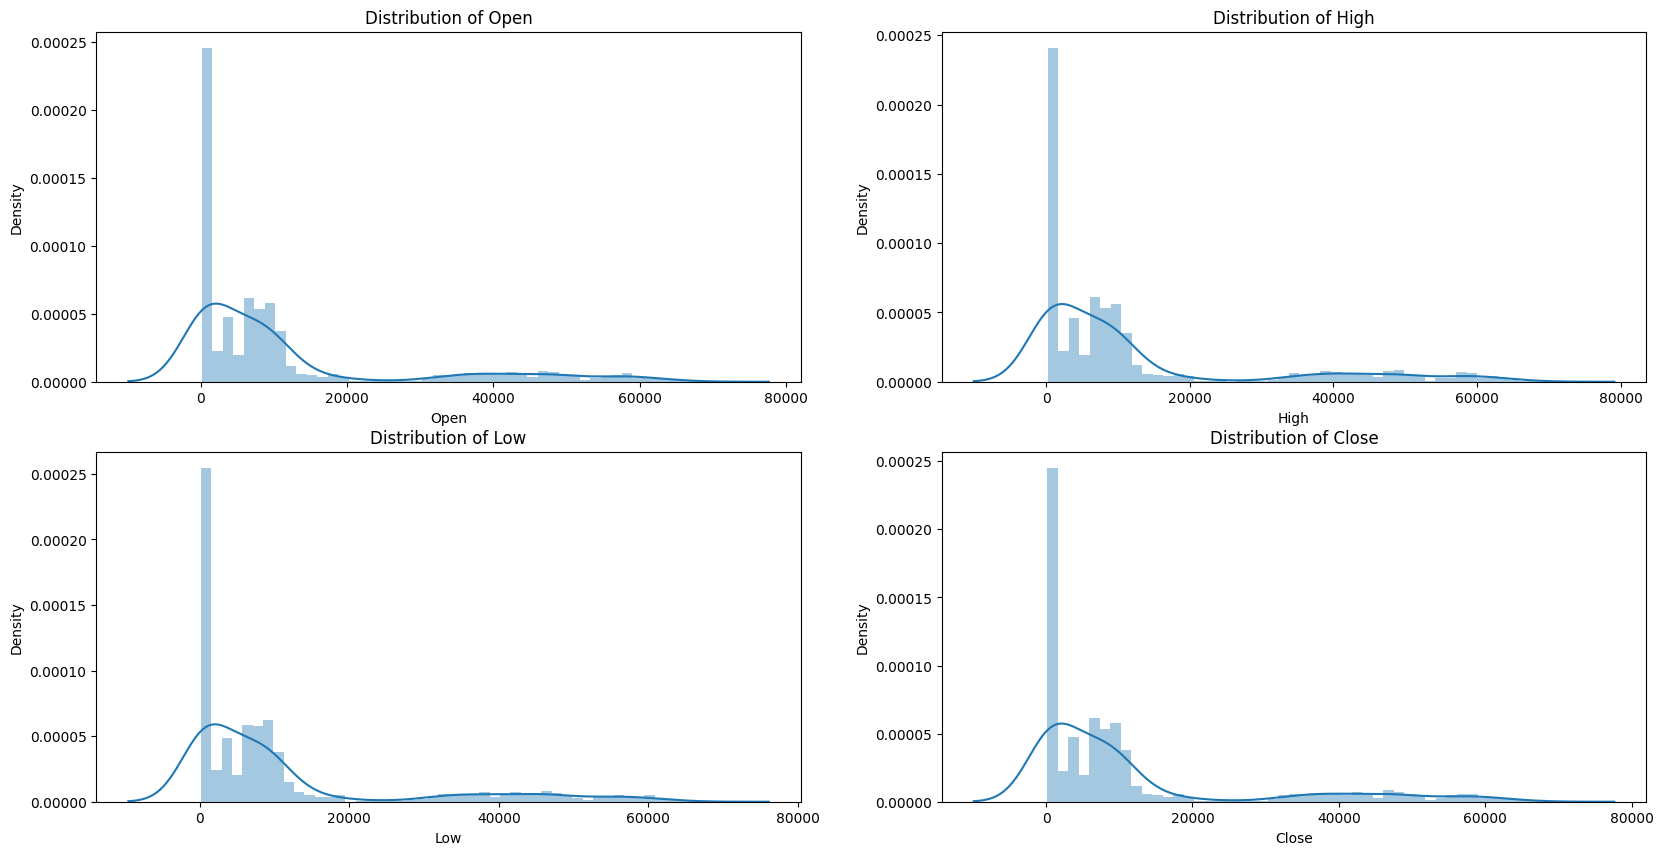

In [10]:
# numerical features
num_features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(num_features):
    plt.subplot(2,2,i+1)
    sns.distplot(btc_df[col])
    plt.title(f'Distribution of {col}')
plt.show()

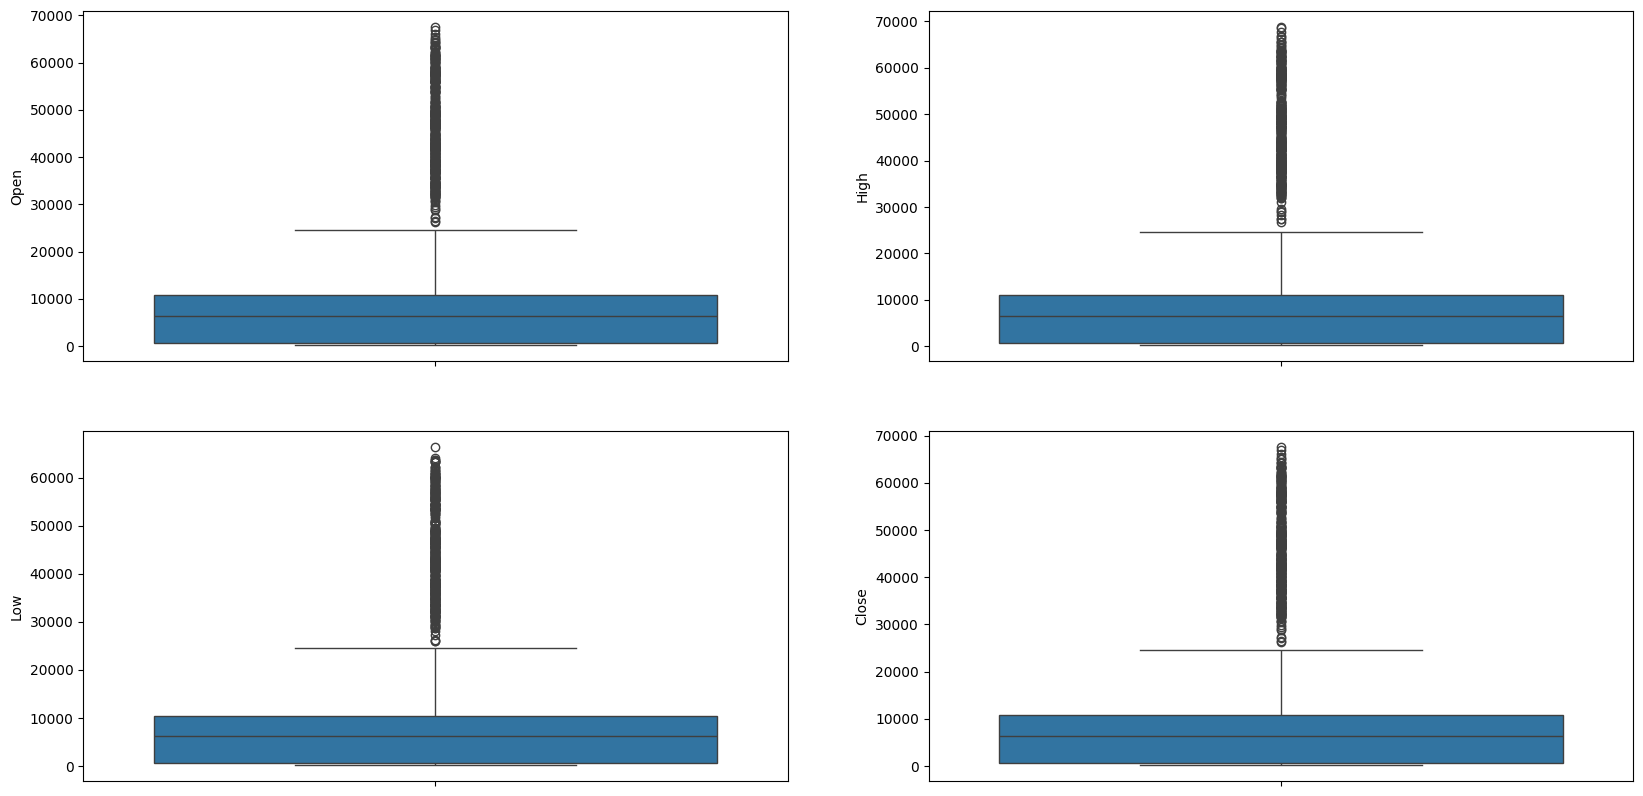

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(num_features):
    plt.subplot(2,2,i+1)
    sns.boxplot(btc_df[col])
plt.show()

There are so many outliers in the data.

In [12]:
# split date into year, month and day 

# convert 'Date' to datetime
btc_df['Date'] = pd.to_datetime(btc_df['Date'])

# Split into year, month, and day
btc_df['year'] = btc_df['Date'].dt.year
btc_df['month'] = btc_df['Date'].dt.month
btc_df['day'] = btc_df['Date'].dt.day

# Print newly engineered data
btc_df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


I've introduced new features year, month and day by splitting 'Date' column, it will easier to narrow down where the coutliers are in a given time.

In [13]:
# timerange 
btc_df.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

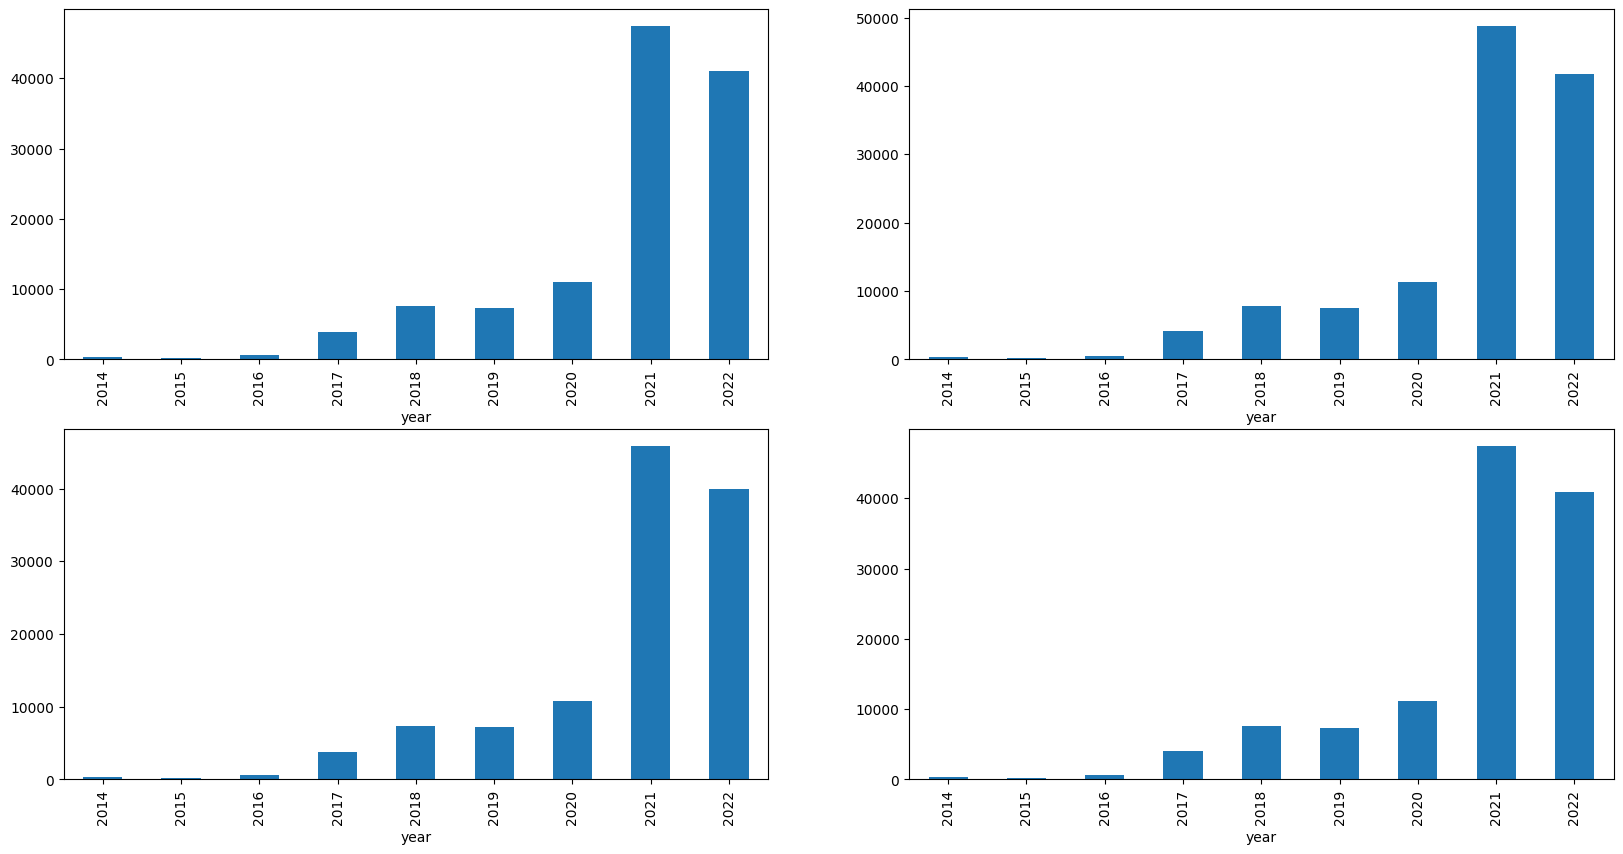

In [14]:
data_grouped = btc_df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


The year 2021 has outliers 

In [15]:
# explore the difference between open and close price 
btc_df['Open-Close'] = btc_df['Close'] - btc_df['Open']
btc_df['Price_Diff'] = np.where(btc_df['Open-Close'] < 0, 0, 1)  # 0 for bearish and 1 for bullish

In [16]:
btc_df.head(10)

,Date,Open,High,Low,Close,Volume,year,month,day,Open-Close,Price_Diff
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,-8.529999,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,-32.419983,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,-29.307007,0
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,14.230988,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,-9.263977,0
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,24127600,2014,9,22,3.052002,1
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,45099500,2014,9,23,33.698975,1
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,30627700,2014,9,24,-12.546020,0
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,26814400,2014,9,25,-11.582001,0
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,21460800,2014,9,26,-7.003998,0


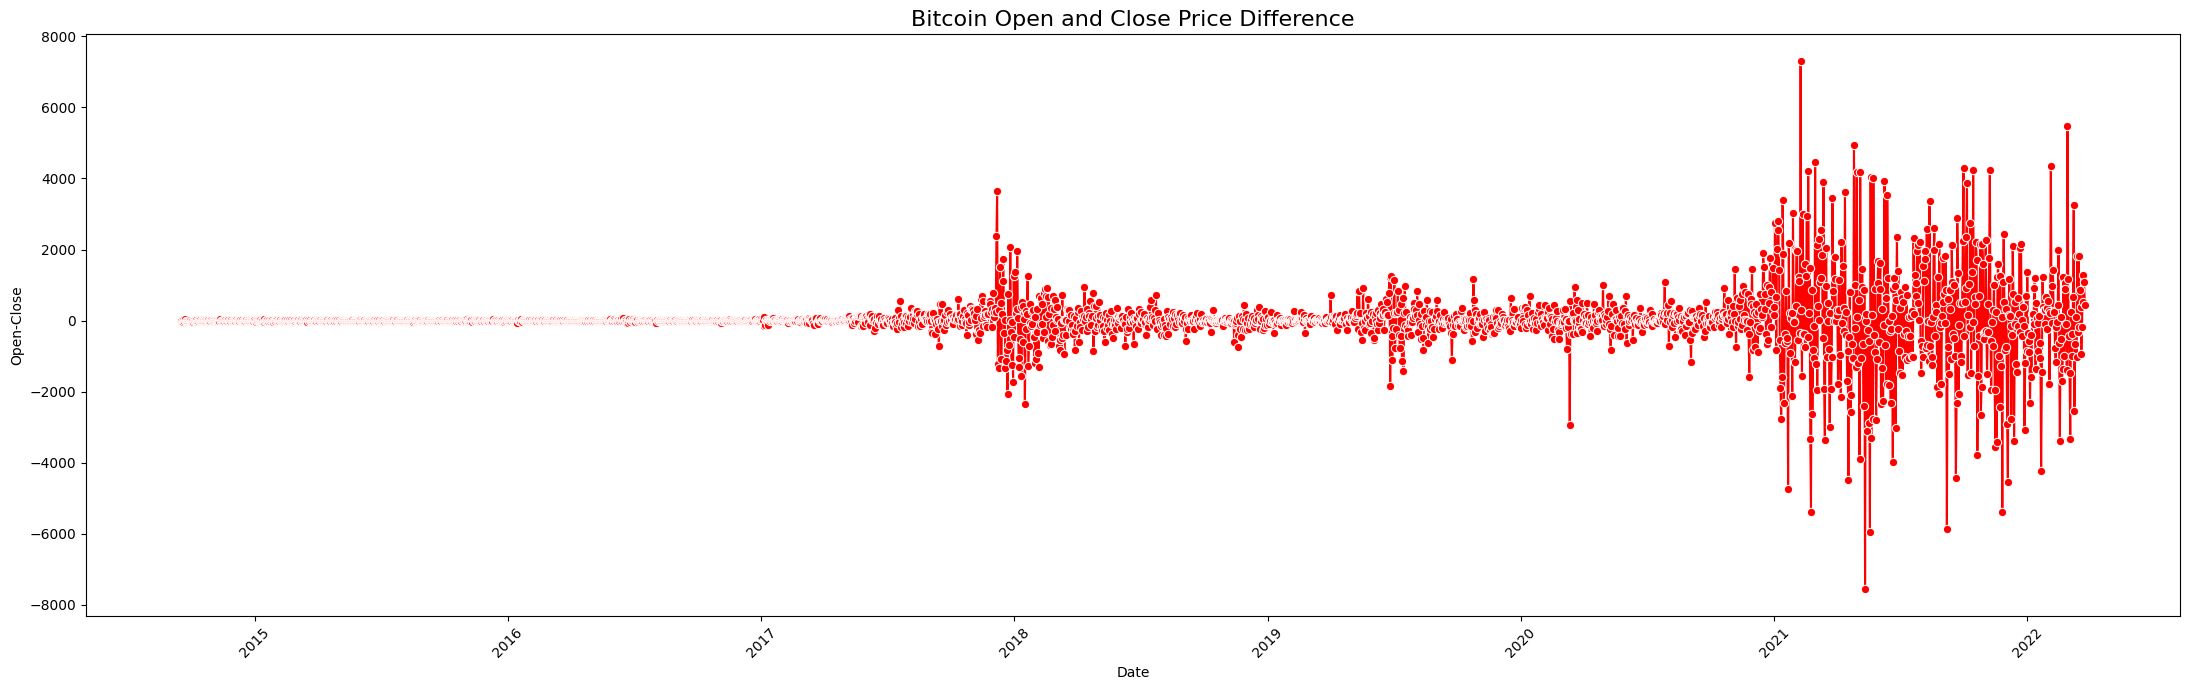

In [34]:
#  visualize 
plt.figure(figsize=(22, 7))
sns.lineplot(data = btc_df, x = 'Date', y = 'Open-Close', marker='o', linestyle='-', color='red')
plt.title('Bitcoin Open and Close Price Difference', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Open-Close')
plt.xticks(rotation=45)
plt.tight_layout()